In [1]:
import sys
sys.path.append("..")
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from dory.linear.ols import OrdinaryLeastSquares
from dory.scaler.standard import StandardScaler
from dory.linear.gd import GradientDescentRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
artificial_df = pd.read_csv("artificial1d.csv", header=None)
artificial_df.describe()

,0,1
count,3.000000e+01,30.000000
mean,-2.960595e-17,0.067618
std,6.071316e-01,1.065356
min,-1.000000e+00,-2.082017
25%,-5.000000e-01,-0.870920
50%,0.000000e+00,0.098189
75%,5.000000e-01,0.957162
max,1.000000e+00,2.309838


In [3]:
X = artificial_df.iloc[:, :-1].to_numpy()
y = artificial_df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24, 1) (6, 1) (24,) (6,)


In [4]:
ols_pipeline = Pipeline([
    ("linear", OrdinaryLeastSquares())
])
ols_pipeline

,steps,"[('linear', ...)]"
,transform_input,None
,memory,None
,verbose,False
,fit_intercept,True


/tmp/ipykernel_148010/3597244436.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


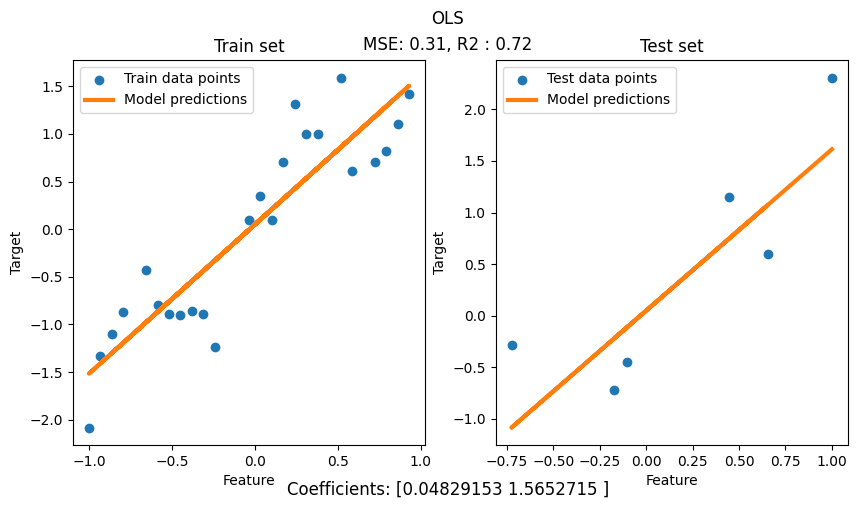

In [5]:
# TODO: Check if this y_pred is normalized and denormalized if needed
y_pred = ols_pipeline.fit(X_train, y_train).predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    ols_pipeline.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("OLS")
fig.text(0.5, 0.9, f'MSE: {mse:.2f}, R2 : {r2:.2f}',fontsize=12, horizontalalignment='center')
fig.text(0.5, 0.01, f'Coefficients: {ols_pipeline.named_steps["linear"].w_}',fontsize=12, horizontalalignment='center')


fig.show()

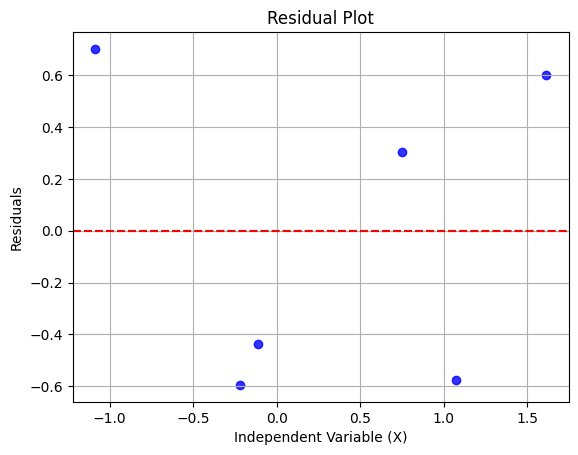

In [6]:
sns.residplot(x=y_pred, y=y_test, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [26]:
epochs = 500
initial_weights = [10.0, 10.0]
gd_pipe = Pipeline(
    [
        (
            "gd",
            GradientDescentRegressor(
                epochs=epochs,
                initial_weights=np.array(initial_weights),
                alpha=0.1,
            ),
        )
    ]
)
gd_pipe

,steps,"[('gd', ...)]"
,transform_input,None
,memory,None
,verbose,False
,epochs,500
,epsilon,0.1
,alpha,0.1
,shuffle,True
,seed,42069
,initial_weights,"array([10., 10.])"
,validation_fraction,0.1


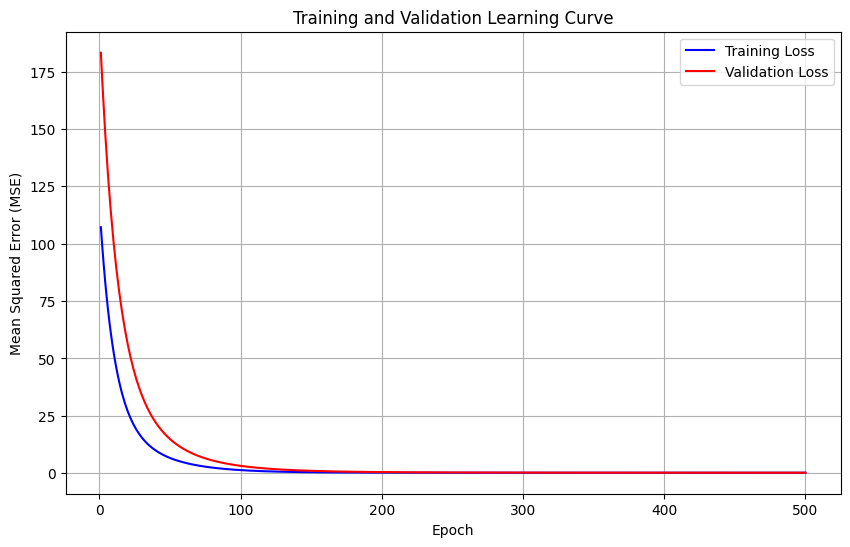

In [27]:
y_pred = gd_pipe.fit(X_train, y_train).predict(X_test)
gd: GradientDescentRegressor = gd_pipe.named_steps["gd"]
mse = mean_squared_error(y_test, y_pred)
epochs_range = range(1, epochs+1)

validation_loss = gd.history_["val_loss"]
train_loss = gd.history_["train_loss"]
validation_loss.describe()
train_loss.describe()

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='red')

plt.title('Training and Validation Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()